In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import redis
import pandas as pd

# Connect to Redis
redis_client = redis.StrictRedis(host='localhost', port=6378, db=0)

# Get all keys in Redis
all_keys = redis_client.keys('*')

# Create empty DataFrames for actors and movies
df_actors = pd.DataFrame()
df_movies = pd.DataFrame()

# Iterate through all keys
for key in all_keys:
    # Get values for multiple fields in the hash
    values = redis_client.hgetall(key)
    
    # Convert bytes to string for each value in the hash
    values = {field.decode('utf-8'): value.decode('utf-8') for field, value in values.items()}
    
    # Add the values to the appropriate DataFrame based on the key pattern
    if key.decode('utf-8').startswith('actor:'):
        df_actors = df_actors.append(pd.DataFrame([values]))
    elif key.decode('utf-8').startswith('movie:'):
        df_movies = df_movies.append(pd.DataFrame([values]))

# Reset index of the DataFrames
df_actors.reset_index(drop=True, inplace=True)
df_movies.reset_index(drop=True, inplace=True)

# Print the DataFrames
print("DataFrame for Actors:")
print(df_actors)

print("\nDataFrame for Movies:")
print(df_movies)

DataFrame for Actors:
     first_name   last_name date_of_birth
0         Oscar       Isaac          1979
1       Dominic      Fumusa          1969
2       Justina     Machado          1972
3         Carla      Gugino          1971
4         David     Clennon          1943
...         ...         ...           ...
1314        Dan     Stevens          1982
1315      Haley     Bennett          1988
1316   Stefania  LaVie Owen          1997
1317     Stefan     Kapicic          1978
1318     Imelda    Staunton          1956

[1319 rows x 3 columns]

DataFrame for Movies:
    votes                          title release_year  \
0     136                Wild Texas Wind         1991   
1      14               Goin' to Chicago         1991   
2      73        Canada: The Story of Us         2017   
3     653     Un village presque parfait         2014   
4    1438                    The Boat ()         2018   
..    ...                            ...          ...   
917   171            Young 

In [3]:
df_actors.head()

,first_name,last_name,date_of_birth
0,Oscar,Isaac,1979
1,Dominic,Fumusa,1969
2,Justina,Machado,1972
3,Carla,Gugino,1971
4,David,Clennon,1943


In [4]:
df_movies.head()

,votes,title,release_year,plot,rating,genre,poster,ibmdb_id
0,136,Wild Texas Wind,1991,A country singer becomes romantically entangle...,6.1,Drama,https://m.media-amazon.com/images/M/MV5BYTg2OD...,tt0103263
1,14,Goin' to Chicago,1991,N/A,7.4,Drama,N/A,tt0187067
2,73,Canada: The Story of Us,2017,N/A,5.5,Drama,https://m.media-amazon.com/images/M/MV5BZTAzND...,tt6076476
3,653,Un village presque parfait,2014,"'Saint-Far-la-Mauderne',a small village hit ha...",5.9,Comedy,https://m.media-amazon.com/images/M/MV5BZDY2MD...,tt3324286
4,1438,The Boat (),2018,A solo sailor is locked inside the head of a s...,5.4,Mystery,https://m.media-amazon.com/images/M/MV5BMjA5MD...,tt7468616


IndexError: index 0 is out of bounds for axis 0 with size 0

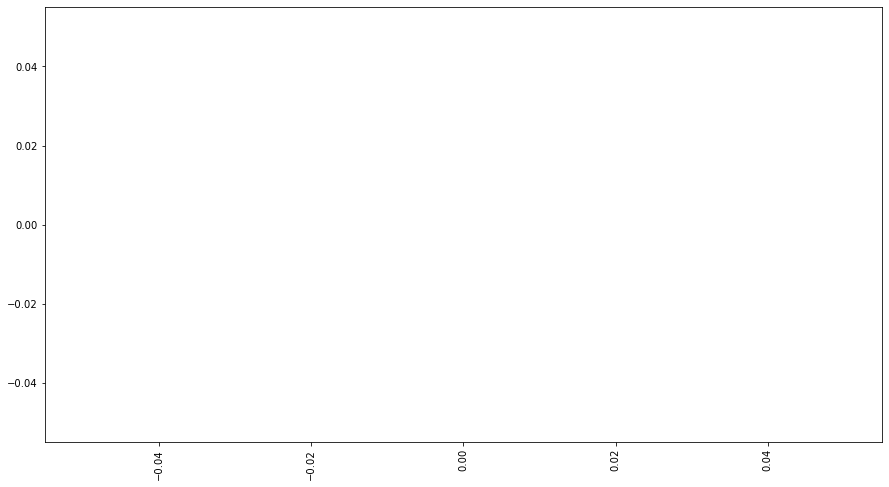

In [15]:
missing = df_movies.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
plt.figure(figsize=(15,8))
missing.plot.bar()

In [6]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   votes         922 non-null    object
 1   title         922 non-null    object
 2   release_year  922 non-null    object
 3   plot          668 non-null    object
 4   rating        922 non-null    object
 5   genre         922 non-null    object
 6   poster        667 non-null    object
 7   ibmdb_id      653 non-null    object
dtypes: object(8)
memory usage: 57.8+ KB


In [7]:
df_actors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   first_name     1319 non-null   object
 1   last_name      1319 non-null   object
 2   date_of_birth  1319 non-null   object
dtypes: object(3)
memory usage: 31.0+ KB


In [12]:
# Điền giá trị thiếu trong cột 'plot' bằng "unknown"
df_movies['plot'].fillna('unknown', inplace=True)

# Điền giá trị thiếu trong cột 'poster' bằng "unknown"
df_movies['poster'].fillna('unknown', inplace=True)

# Điền giá trị thiếu trong cột 'ibmdb_id' bằng "unknown"
df_movies['ibmdb_id'].fillna('unknown', inplace=True)

In [13]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   votes         922 non-null    object
 1   title         922 non-null    object
 2   release_year  922 non-null    object
 3   plot          922 non-null    object
 4   rating        922 non-null    object
 5   genre         922 non-null    object
 6   poster        922 non-null    object
 7   ibmdb_id      922 non-null    object
dtypes: object(8)
memory usage: 57.8+ KB


In [14]:
df_movies.head()

,votes,title,release_year,plot,rating,genre,poster,ibmdb_id
0,136,Wild Texas Wind,1991,A country singer becomes romantically entangle...,6.1,Drama,https://m.media-amazon.com/images/M/MV5BYTg2OD...,tt0103263
1,14,Goin' to Chicago,1991,N/A,7.4,Drama,N/A,tt0187067
2,73,Canada: The Story of Us,2017,N/A,5.5,Drama,https://m.media-amazon.com/images/M/MV5BZTAzND...,tt6076476
3,653,Un village presque parfait,2014,"'Saint-Far-la-Mauderne',a small village hit ha...",5.9,Comedy,https://m.media-amazon.com/images/M/MV5BZDY2MD...,tt3324286
4,1438,The Boat (),2018,A solo sailor is locked inside the head of a s...,5.4,Mystery,https://m.media-amazon.com/images/M/MV5BMjA5MD...,tt7468616


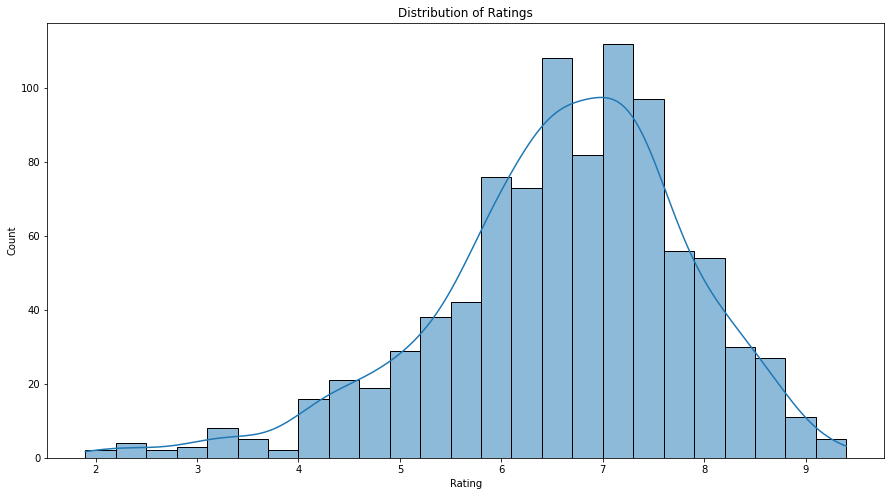

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chuyển đổi kiểu dữ liệu cột 'rating' sang numeric nếu chưa thực hiện
df_movies['rating'] = pd.to_numeric(df_movies['rating'], errors='coerce')

plt.figure(figsize=(15,8))

# Visualize distribution của điểm (rating)
sns.histplot(df_movies['rating'].dropna(), kde=True)

plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.show()

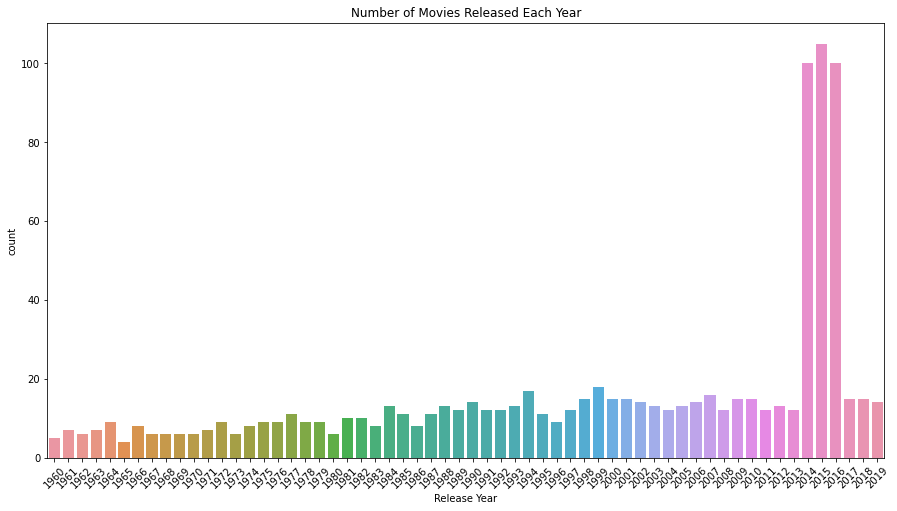

In [22]:
# Chuyển đổi kiểu dữ liệu cột 'release_year' sang numeric nếu chưa thực hiện
df_movies['release_year'] = pd.to_numeric(df_movies['release_year'], errors='coerce')

# Visualize số lượng phim theo năm phát hành
plt.figure(figsize=(15,8))
sns.countplot(x='release_year', data=df_movies)
plt.title('Number of Movies Released Each Year')
plt.xlabel('Release Year')
plt.xticks(rotation=45)
plt.show()

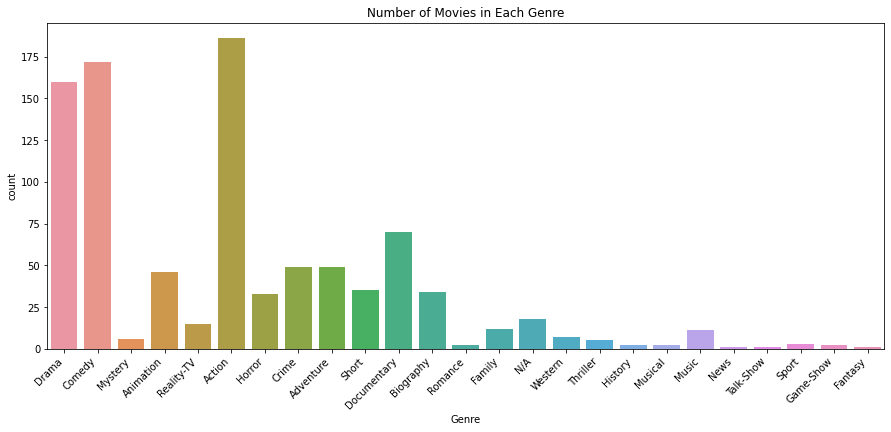

In [23]:
# Visualize số lượng phim theo thể loại
plt.figure(figsize=(15, 6))
sns.countplot(x='genre', data=df_movies)
plt.title('Number of Movies in Each Genre')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.show()

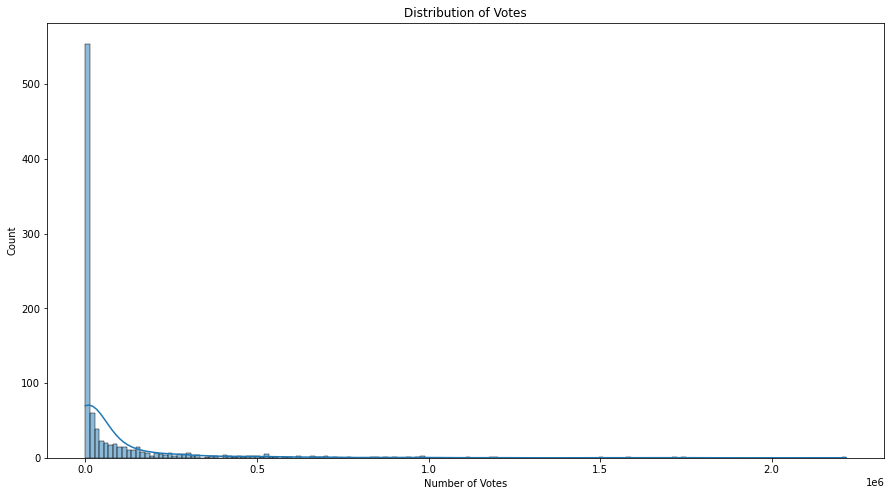

In [24]:
# Chuyển đổi kiểu dữ liệu cột 'votes' sang numeric nếu chưa thực hiện
df_movies['votes'] = pd.to_numeric(df_movies['votes'], errors='coerce')

# Visualize distribution của số lượng votes
plt.figure(figsize=(15,8))
sns.histplot(df_movies['votes'].dropna(), kde=True)
plt.title('Distribution of Votes')
plt.xlabel('Number of Votes')
plt.show()